In [94]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
import matplotlib.pyplot as plt
import sklearn


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset1.csv to dataset1.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['dataset1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df2.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [116]:
print(X.shape)
print(y.shape)

(200, 1)
(200,)


In [ ]:
df2.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


(0.0, 9.0)

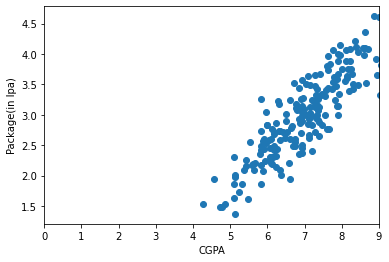

In [ ]:
plt.scatter(df2['cgpa'],df2['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.xlim(0, 9)


(4.0, 9.0)

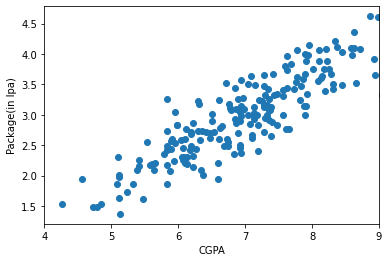

In [ ]:
plt.scatter(df2['cgpa'],df2['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.xlim(4, 9)

In [ ]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#######using random state concept 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
                                                 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test

,cgpa
192,8.25
57,6.60
76,6.94
164,9.06
19,7.48
185,6.31
29,7.15
6,6.73
159,8.71
161,7.30


In [ ]:
y_test

192    3.75
57     1.94
76     3.15
164    3.82
19     2.83
185    3.18
29     3.49
6      2.60
159    4.08
161    3.33
65     3.81
99     3.24
46     2.26
158    3.04
22     2.30
147    2.21
139    2.40
184    3.14
75     3.28
94     2.42
18     2.98
127    3.11
53     2.61
9      3.51
196    2.57
78     2.21
40     4.02
125    3.16
165    4.08
183    2.72
109    4.06
26     3.42
71     3.34
85     1.48
33     2.73
181    3.89
142    3.04
58     3.09
176    3.23
117    2.99
Name: package, dtype: float64

In [ ]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([2.97012606])

Text(0, 0.5, 'Package(in lpa)')

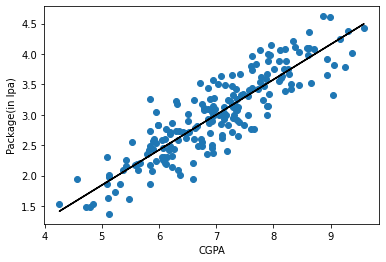

In [ ]:
plt.scatter(df2['cgpa'],df2['package'])
plt.plot(X_train,lr.predict(X_train),color='black')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
m = lr.coef_

In [ ]:
b = lr.intercept_

In [ ]:
# y = mx + b

m * 8.58 + b

array([3.9143258])

In [ ]:
m * 9.5 + b

array([4.4467645])

In [ ]:
m * 100 + b

array([56.82252871])

In [91]:
df2_error=pd.DataFrame()
df2_error['y_test']=y_train
df2_error['y_test']=y_test
df2_error.shape

(160, 1)

In [92]:
df2_error

,y_test
81,NaN
21,NaN
47,NaN
116,NaN
167,NaN
...,...
188,NaN
171,NaN
61,NaN
0,NaN


In [101]:
import sklearn.metrics

In [106]:
y_pred = lr.predict(X_test)

In [107]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.29622642422240003

In [108]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.1326718688810018

In [109]:
# Root Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

0.36424149802157607

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6538196440468262